In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot

In [2]:
# Example 1: Vacation Dataset

# Read in data as a panda series
# https://trends.google.com/trends/?geo=US , google trends, search the word "vacation"
# Recall that data is from 2004 to 2019
vacation = pd.read_csv(r'C:\Users\ungdu\Downloads\vacation_firstdiff.csv', index_col=0, parse_dates=True)

            first_diff
Month                 
2004-04-01        -7.0
2004-05-01        10.0
2004-06-01         9.0
2004-07-01        -2.0
2004-08-01       -17.0


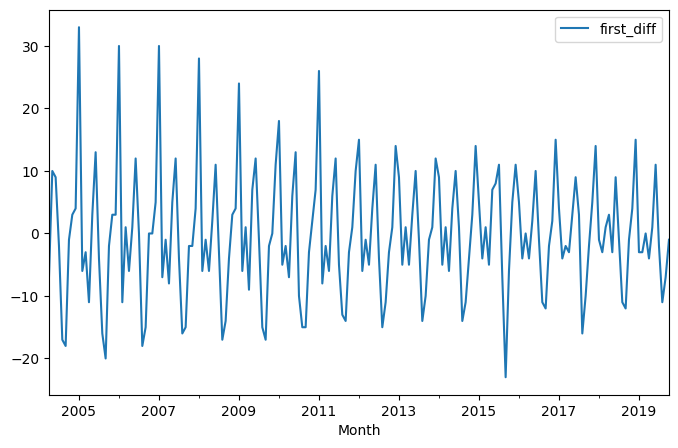

In [3]:
# display first few rows
print(vacation.head(5))
# line plot of dataset
vacation.plot(figsize=(8,5))
pyplot.show()
# data is monthly and is made stationary

In [4]:
vacation.describe()

,first_diff
count,187.000000
mean,-0.262032
std,9.853813
min,-23.000000
25%,-6.000000
50%,-1.000000
75%,5.000000
max,33.000000


<Axes: ylabel='Density'>

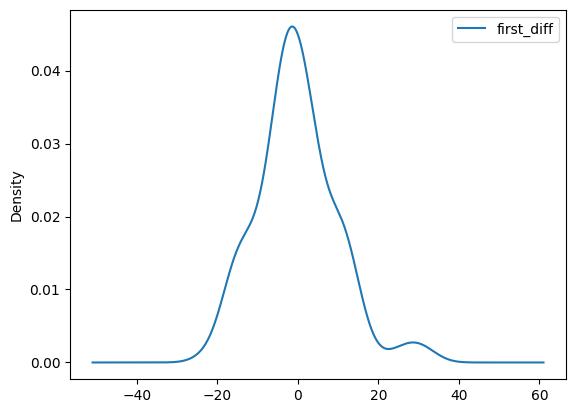

In [5]:
# Kernel Density Plot
vacation.plot(kind='kde')

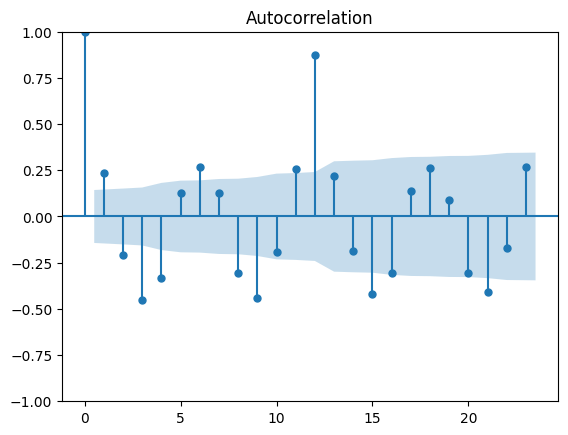

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
# Check for autocorrelation of each lagged observation and whether it is statistically significant.
plot_acf(vacation)
pyplot.show()

In [7]:
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df1 = DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [8]:
# Create 12 months of lag values to predict current observation
# Shift of 12 months
for i in range(12,0,-1):
    df1['t-'+str(i)] = vacation.shift(i)
print(df1)

            t-12  t-11  t-10   t-9   t-8   t-7   t-6  t-5   t-4   t-3   t-2  \
Month                                                                         
2004-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   
2004-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   
2004-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  -7.0   
2004-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  -7.0  10.0   
2004-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  -7.0  10.0   9.0   
...          ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   
2019-06-01   9.0  -1.0 -11.0 -12.0  -1.0   4.0  15.0 -3.0  -3.0   0.0  -4.0   
2019-07-01  -1.0 -11.0 -12.0  -1.0   4.0  15.0  -3.0 -3.0   0.0  -4.0   1.0   
2019-08-01 -11.0 -12.0  -1.0   4.0  15.0  -3.0  -3.0  0.0  -4.0   1.0  11.0   
2019-09-01 -12.0  -1.0   4.0  15.0  -3.0  -3.0   0.0 -4.0   1.0  11.0  -2.0   
2019-10-01  -1.0   4.0  15.0  -3.0  -3.0   0.0  -4.0

In [9]:
# Create column t
df1['t'] = vacation.values
print(df1.head(13))

            t-12  t-11  t-10   t-9   t-8   t-7   t-6   t-5   t-4   t-3   t-2  \
Month                                                                          
2004-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2004-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2004-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  -7.0   
2004-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  -7.0  10.0   
2004-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  -7.0  10.0   9.0   
2004-09-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN  -7.0  10.0   9.0  -2.0   
2004-10-01   NaN   NaN   NaN   NaN   NaN   NaN  -7.0  10.0   9.0  -2.0 -17.0   
2004-11-01   NaN   NaN   NaN   NaN   NaN  -7.0  10.0   9.0  -2.0 -17.0 -18.0   
2004-12-01   NaN   NaN   NaN   NaN  -7.0  10.0   9.0  -2.0 -17.0 -18.0  -1.0   
2005-01-01   NaN   NaN   NaN  -7.0  10.0   9.0  -2.0 -17.0 -18.0  -1.0   3.0   
2005-02-01   NaN   NaN  -7.0  10.0   9.0

In [10]:
# Create a new subsetted dataframe, removing Nans from first 12 rows
df1_vacat = df1[13:]
print(df1_vacat)

            t-12  t-11  t-10   t-9   t-8   t-7   t-6   t-5   t-4   t-3   t-2  \
Month                                                                          
2005-05-01  10.0   9.0  -2.0 -17.0 -18.0  -1.0   3.0   4.0  33.0  -6.0  -3.0   
2005-06-01   9.0  -2.0 -17.0 -18.0  -1.0   3.0   4.0  33.0  -6.0  -3.0 -11.0   
2005-07-01  -2.0 -17.0 -18.0  -1.0   3.0   4.0  33.0  -6.0  -3.0 -11.0   3.0   
2005-08-01 -17.0 -18.0  -1.0   3.0   4.0  33.0  -6.0  -3.0 -11.0   3.0  13.0   
2005-09-01 -18.0  -1.0   3.0   4.0  33.0  -6.0  -3.0 -11.0   3.0  13.0  -4.0   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2019-06-01   9.0  -1.0 -11.0 -12.0  -1.0   4.0  15.0  -3.0  -3.0   0.0  -4.0   
2019-07-01  -1.0 -11.0 -12.0  -1.0   4.0  15.0  -3.0  -3.0   0.0  -4.0   1.0   
2019-08-01 -11.0 -12.0  -1.0   4.0  15.0  -3.0  -3.0   0.0  -4.0   1.0  11.0   
2019-09-01 -12.0  -1.0   4.0  15.0  -3.0  -3.0   0.0  -4.0   1.0  11.0  -2.0   
2019-10-01  -1.0   4.0  15.0  -3.0  -3.0

In [11]:
# save to new file
df1_vacat.to_csv('vacation_lags_12months_features.csv', index=False)

In [12]:
# Example 2: Furniture Dataset
furniture = pd.read_csv(r'C:\Users\ungdu\Downloads\furn_pctchange.csv', index_col=0, parse_dates=True)

In [13]:
# display first few rows
print(furniture.head())

            furniture_pct_change
Month                           
1992-02-01              0.019800
1992-03-01              0.069088
1992-04-01             -0.002419
1992-05-01              0.033839
1992-06-01              0.022829


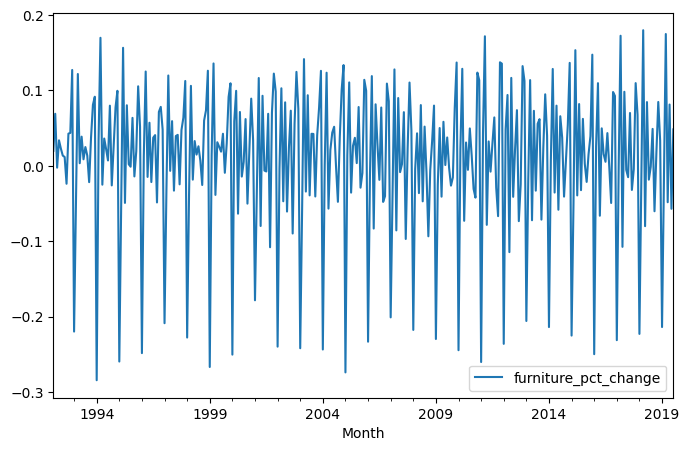

In [14]:
# line plot of dataset
furniture.plot(figsize=(8,5))
pyplot.show()

In [15]:
furniture.describe()

,furniture_pct_change
count,330.000000
mean,0.009588
std,0.094790
min,-0.284492
25%,-0.032020
50%,0.022959
75%,0.073826
max,0.179970


<Axes: ylabel='Density'>

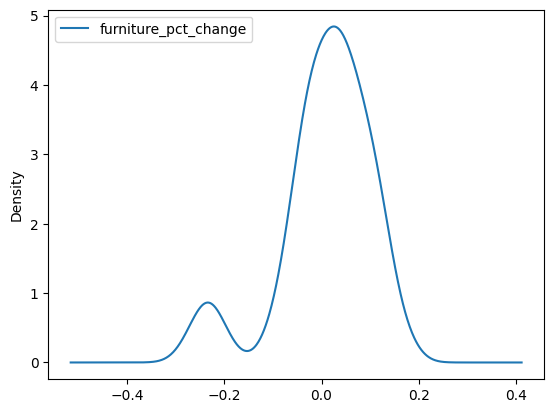

In [16]:
# Kernel Density Plot
furniture.plot(kind='kde')

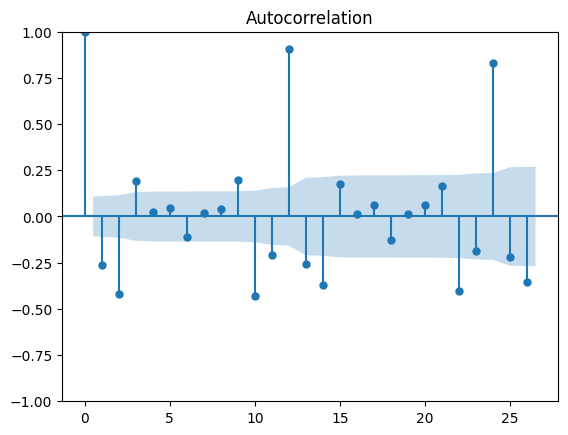

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
# Check for autocorrelation of each lagged observation and whether it is statistically significant.
plot_acf(furniture)
pyplot.show()

In [18]:
from pandas import DataFrame
# reframe as supervised learning
# lab observation (t-1) is the input variable and t is the output variable.
df2 = DataFrame()
# print(df2)

In [19]:
# Create 12 months of lag values to predict current observation
# Shift of 12 months
for i in range(12,0,-1):
    df2['t-'+str(i)] = furniture.shift(i)
print(df2)

                t-12      t-11      t-10       t-9       t-8       t-7  \
Month                                                                    
1992-02-01       NaN       NaN       NaN       NaN       NaN       NaN   
1992-03-01       NaN       NaN       NaN       NaN       NaN       NaN   
1992-04-01       NaN       NaN       NaN       NaN       NaN       NaN   
1992-05-01       NaN       NaN       NaN       NaN       NaN       NaN   
1992-06-01       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2019-03-01  0.179970 -0.080049  0.084601 -0.018317 -0.001271  0.049036   
2019-04-01 -0.080049  0.084601 -0.018317 -0.001271  0.049036 -0.060266   
2019-05-01  0.084601 -0.018317 -0.001271  0.049036 -0.060266  0.017193   
2019-06-01 -0.018317 -0.001271  0.049036 -0.060266  0.017193  0.084769   
2019-07-01 -0.001271  0.049036 -0.060266  0.017193  0.084769  0.033371   

                 t-6       t-5       

In [20]:
# Create column t
df2['t'] = furniture.values
print(df2.head(13))

              t-12      t-11      t-10       t-9       t-8       t-7  \
Month                                                                  
1992-02-01     NaN       NaN       NaN       NaN       NaN       NaN   
1992-03-01     NaN       NaN       NaN       NaN       NaN       NaN   
1992-04-01     NaN       NaN       NaN       NaN       NaN       NaN   
1992-05-01     NaN       NaN       NaN       NaN       NaN       NaN   
1992-06-01     NaN       NaN       NaN       NaN       NaN       NaN   
1992-07-01     NaN       NaN       NaN       NaN       NaN       NaN   
1992-08-01     NaN       NaN       NaN       NaN       NaN       NaN   
1992-09-01     NaN       NaN       NaN       NaN       NaN  0.019800   
1992-10-01     NaN       NaN       NaN       NaN  0.019800  0.069088   
1992-11-01     NaN       NaN       NaN  0.019800  0.069088 -0.002419   
1992-12-01     NaN       NaN  0.019800  0.069088 -0.002419  0.033839   
1993-01-01     NaN  0.019800  0.069088 -0.002419  0.033839  0.02

In [21]:
# Create a new subsetted dataframe, removing Nans from first 12 rows
df2_furn = df2[13:]
print(df2_furn)

                t-12      t-11      t-10       t-9       t-8       t-7  \
Month                                                                    
1993-03-01  0.069088 -0.002419  0.033839  0.022829  0.013640  0.011722   
1993-04-01 -0.002419  0.033839  0.022829  0.013640  0.011722 -0.023777   
1993-05-01  0.033839  0.022829  0.013640  0.011722 -0.023777  0.042725   
1993-06-01  0.022829  0.013640  0.011722 -0.023777  0.042725  0.043720   
1993-07-01  0.013640  0.011722 -0.023777  0.042725  0.043720  0.127219   
...              ...       ...       ...       ...       ...       ...   
2019-03-01  0.179970 -0.080049  0.084601 -0.018317 -0.001271  0.049036   
2019-04-01 -0.080049  0.084601 -0.018317 -0.001271  0.049036 -0.060266   
2019-05-01  0.084601 -0.018317 -0.001271  0.049036 -0.060266  0.017193   
2019-06-01 -0.018317 -0.001271  0.049036 -0.060266  0.017193  0.084769   
2019-07-01 -0.001271  0.049036 -0.060266  0.017193  0.084769  0.033371   

                 t-6       t-5       

In [22]:
# save to new file
df2_furn.to_csv('furniture_lags_12months_features.csv', index=False)